# LOGISTIC REGRESSION WITH PYTHON

In this notebook, we will use a telecommunication dataset for predicting customer churn. Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

This notebook is based on IBM Skill Network's Machine Learning with Python course. We will use Logistic Regression for classification, preprocess data for modelling and implement logistic regression on real world data.

## Install and import the required libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load data from URL

In [40]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv'
churn_df = pd.read_csv(url)

churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.00,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.00,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.00,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.10,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.00,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,24.50,0.00,14.25,0.0,973.10,1343.50,720.0,0.0,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,28.00,0.00,12.75,0.0,203.25,959.40,435.0,0.0,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,23.75,0.00,12.50,0.0,29.90,128.45,80.0,0.0,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,47.75,0.00,32.75,64.0,186.60,1152.90,780.0,1.0,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [41]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

Lets select some features for the modeling. Also, we need to change the target data type to be an integer, as it is a requirement by the scikit-learn algorithm.

## Data Preprocessing

We can use a subset of the fields available to develop our model. Lets assume that the fields we use are 'tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip' and 'churn'.

In [42]:
churn_df = churn_df[['tenure','age','address','income','ed','employ','equip','callcard','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1


For modeling the input fields X and the target field y need to be fixed. Sine the target to be predicted is 'churn', the data under this field will be stored under the variable 'y'. We can use the remaining fields as the input and store these values in the variable 'X'.

In [43]:
X = churn_df[['tenure','age','address','income','ed','employ','equip','callcard']].to_numpy()
print(type(X))
X[0:5]

<class 'numpy.ndarray'>


array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.]])

In [44]:
y = churn_df[['churn']].to_numpy()

Lets standardize the dataset in order to have all the features in the same scale. This helps the model to learn faster and improves the model performance. Lets use StandardScaler from the scikit learn library for this purpose.

In [45]:
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)
X_std[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916]])

## Splitting the dataset

Lets split our dataset into train and test sets in the ratio 80:20 using the train_test_split() function from the scikit learn library.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=4)

## Logistic Regression Classifier modeling

Lets build the model using LogisticRegression from scikit learn library and fit our model on the train dataset.

In [47]:
model = LogisticRegression().fit(X_train,y_train)


Fitting (training) gives us a model that has now learnt from the training data and can be used to predict the target variable. Let us predict the target variable 'churn' on the test dataset.

In [48]:
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Lets have a look at the prediction probability of data points of the test dataset. Using the function predict_proba(), we can obtain the probabilities of each of the entry of the test dataset.

In [49]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob[:10]

array([[0.77047565, 0.22952435],
       [0.93543984, 0.06456016],
       [0.75062776, 0.24937224],
       [0.94883131, 0.05116869],
       [0.77117014, 0.22882986],
       [0.80793559, 0.19206441],
       [0.67970438, 0.32029562],
       [0.91850805, 0.08149195],
       [0.20574314, 0.79425686],
       [0.95243863, 0.04756137]])

In [50]:
y_pred_prob.shape

(40, 2)

We can notice that y_pred_prob is of shape (40,2). The first column indicates the probability of that particular datapoint belonging to class 0 and second column to class 1. The class prediction system uses the threshold for class prediction as 0.5. This means that the class predicted is the one which is the most likely.

In [51]:
coefs = pd.Series(model.coef_[0],index = churn_df.columns[:-1])
print(coefs)

tenure     -0.705065
age        -0.251346
address    -0.107400
income     -0.021573
ed          0.073060
employ     -0.159900
equip       0.745495
callcard   -0.343375
dtype: float64


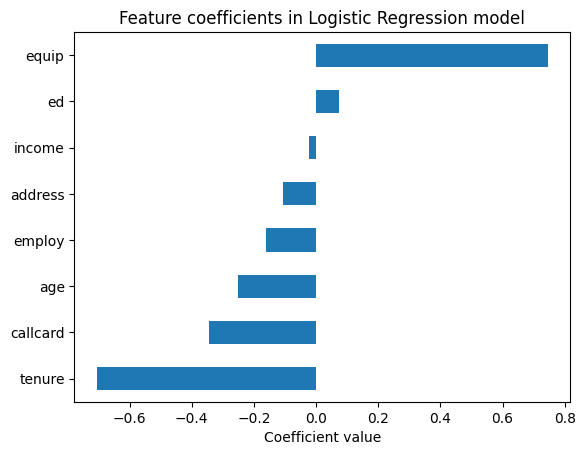

In [52]:
coefs.sort_values().plot(kind='barh')
plt.title('Feature coefficients in Logistic Regression model')
plt.xlabel('Coefficient value')
plt.show()

Large positive value of the model coefficient for a given field indicates that the increase in this parameter will lead to better chance of the churn being class 1. A large negative value indicates the opposite, which means that an increase in this parameter will lead to poorer chance of a positive class. A lower absolute value indicates weaker affect of the change in that field on the predicted class.

## Performance Evaluation

Once the predictions are generated, we need to evaluate the performance of the model in predicting the target variable. Lets evaluate the log loss value.

### Log Loss

Log loss (Logarithmic loss), also known as Binary Cross entropy loss, is a function that generates a loss value based on the class wise prediction probabilities and the actual class labels. The lower the log loss value, the better the model is considered to be.

In [53]:
log_loss(y_test,y_pred_prob)

0.6039104035600186